In [1]:
import numpy as np
import pandas as pd
import wrangle
import itertools
from scipy import stats
import math

#from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import missingno as msno

from pandas.plotting import scatter_matrix

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

# pd.options.display.max_columns = 186
# pd.set_option("display.max_rows", 101)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 200)

In [2]:
## We have a ton of features, let's break them down into their compontent categories

In [3]:
df = pd.read_csv('data/training_v2.csv')
data_dict = pd.read_csv("data/full_data_dictionary.csv")

print('df ' , df.shape)
print('data dictionary ' , data_dict.shape)

df  (91713, 186)
data dictionary  (188, 6)


In [4]:
data_dict.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
Category,identifier,identifier,identifier,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,APACHE prediction,APACHE prediction,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE comorbidity,APACHE grouping,APACHE grouping,GOSSIS example prediction
Variable Name,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_admit_type,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_s

In [5]:
dico=pd.DataFrame(data_dict.T.head(6))
dico.columns= dico.loc[dico.index == 'Variable Name'].unstack().tolist()
dico = dico.loc[dico.index != 'Variable Name']
dico.columns
df_stat = pd.DataFrame(df.describe())
df_stat2 = pd.concat([dico,df_stat],axis=0)
df_stat2.head(20)

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_admit_type,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,pred
Category,identifier,identifier,identifier,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,demographic,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vi

demographic


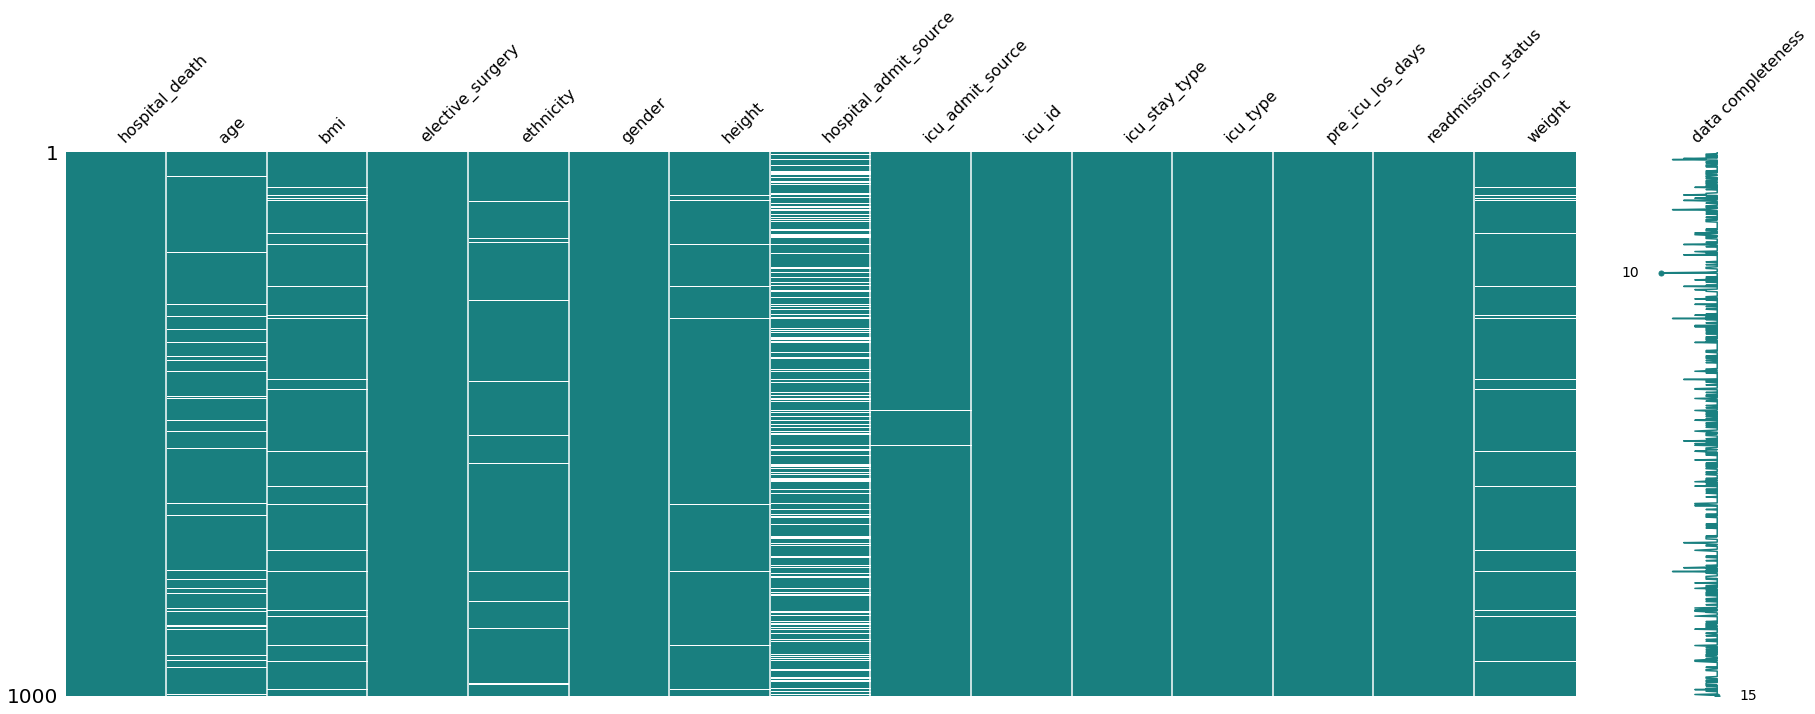

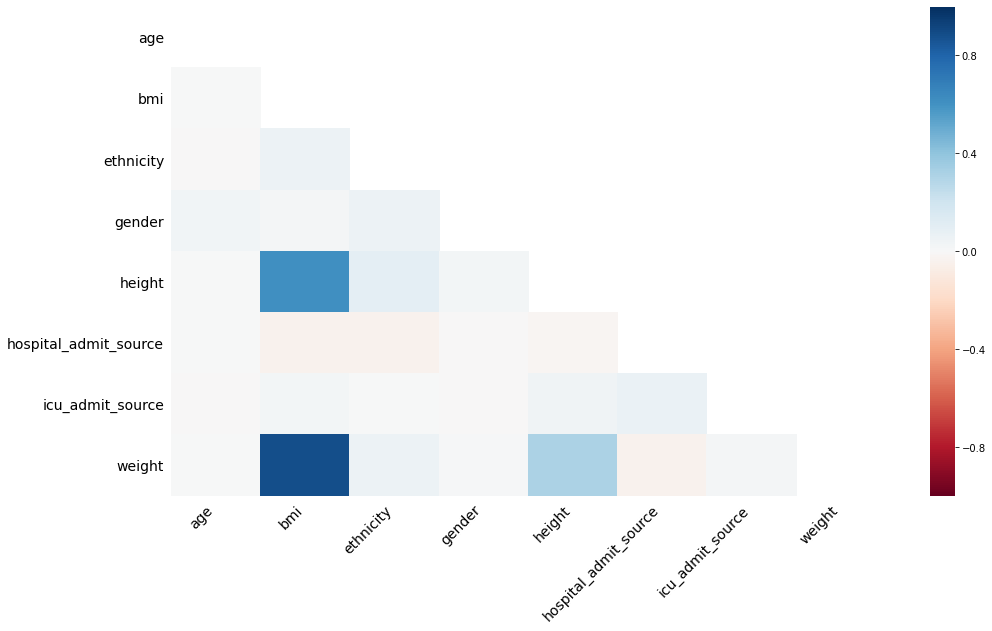

APACHE covariate


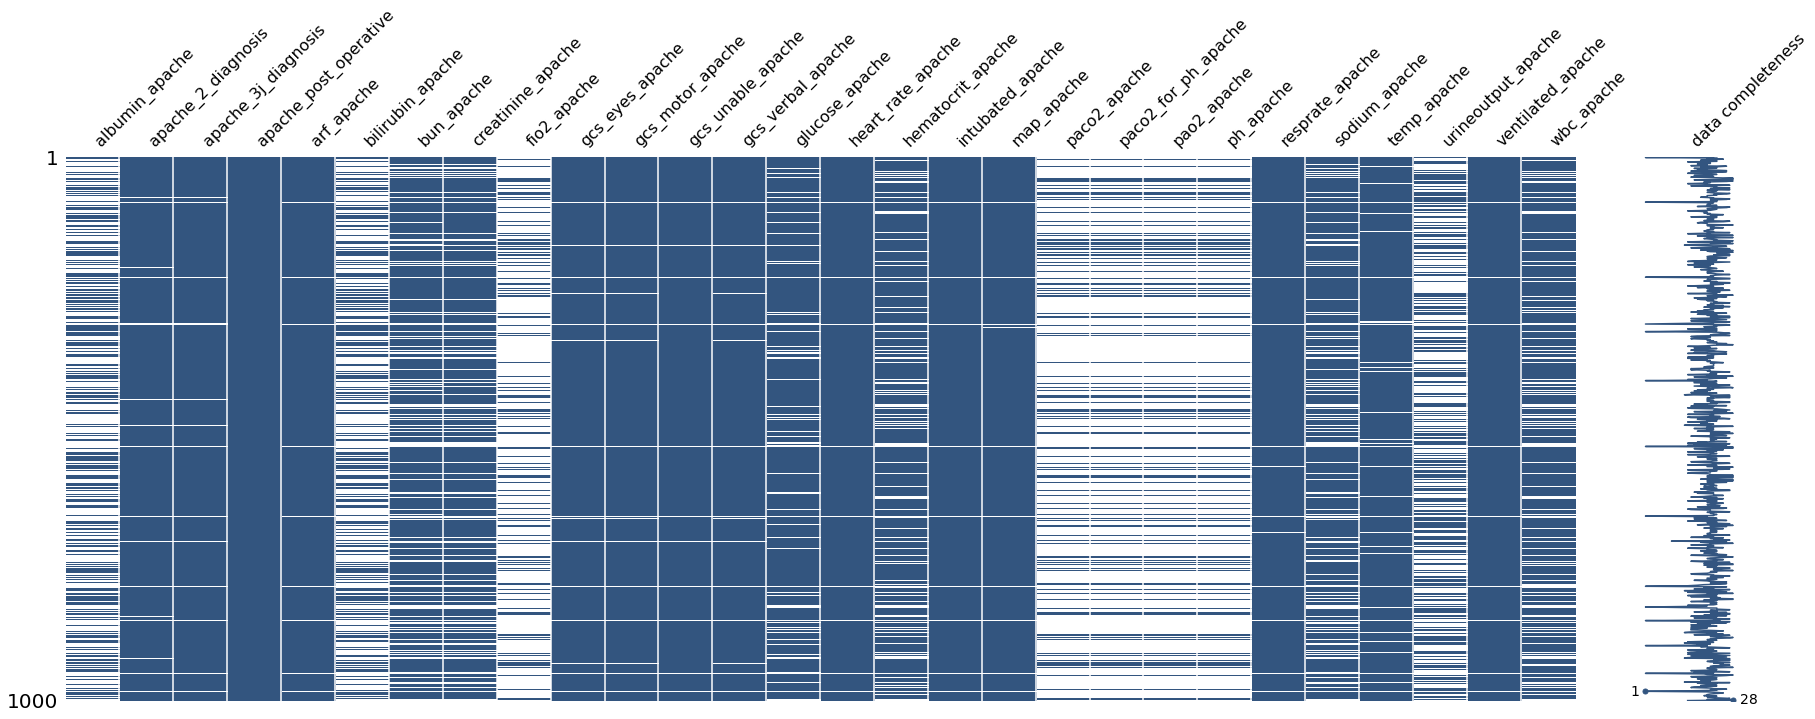

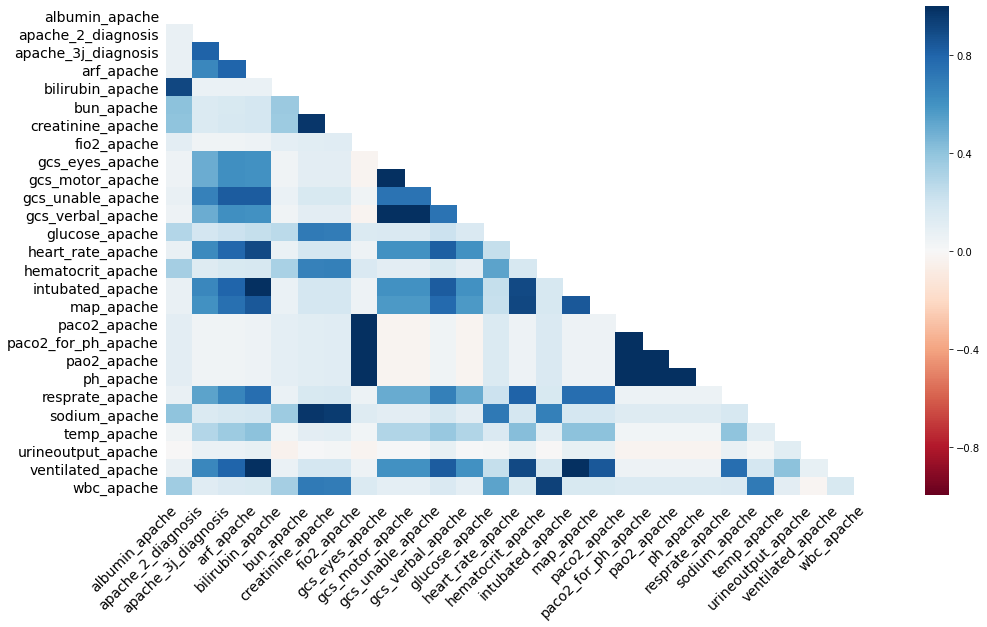

vitals


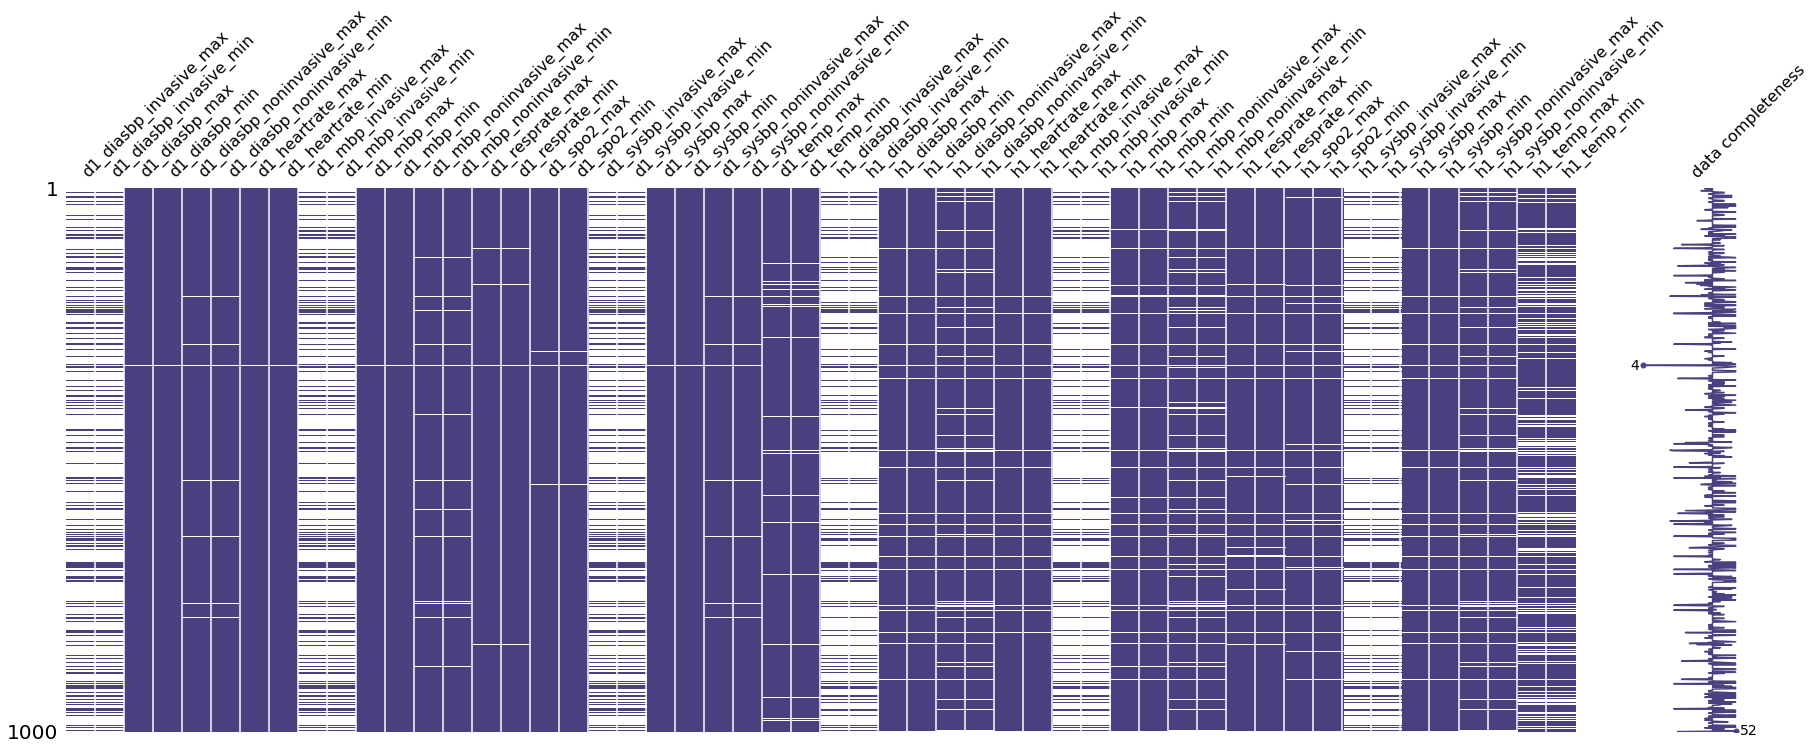

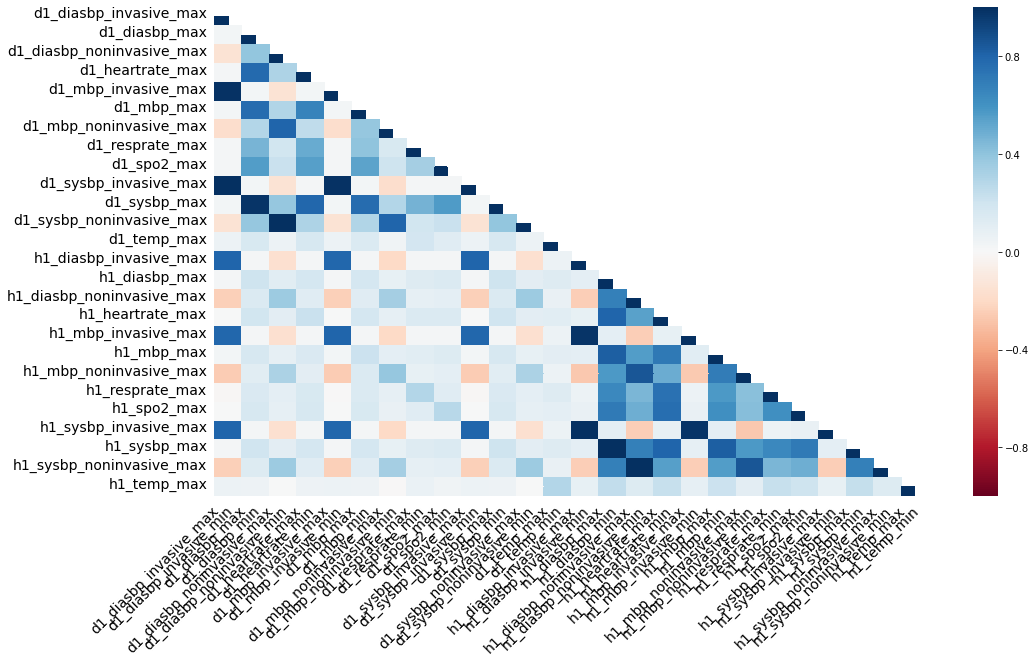

labs


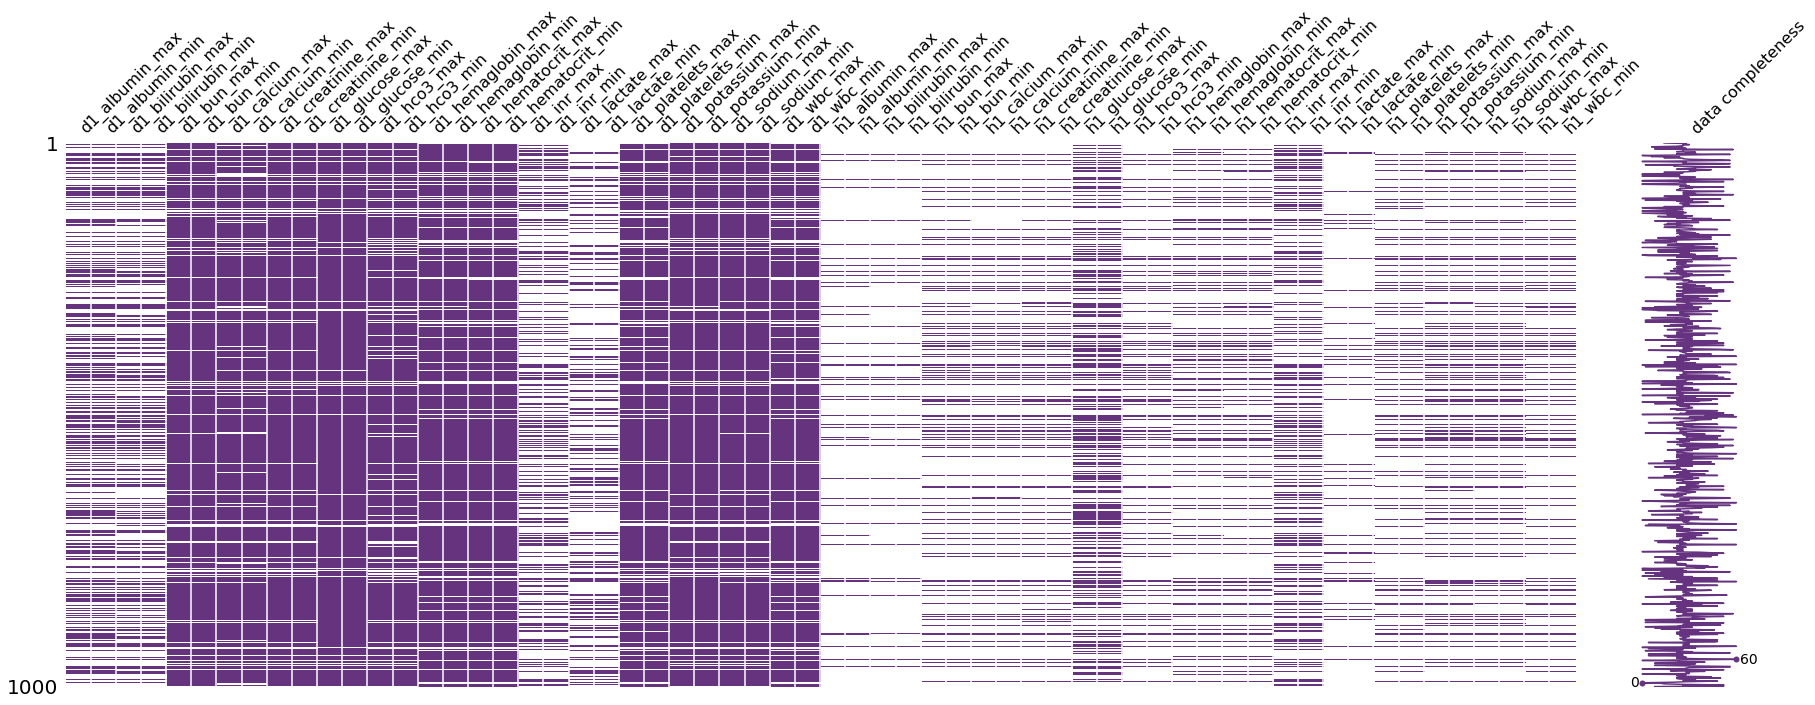

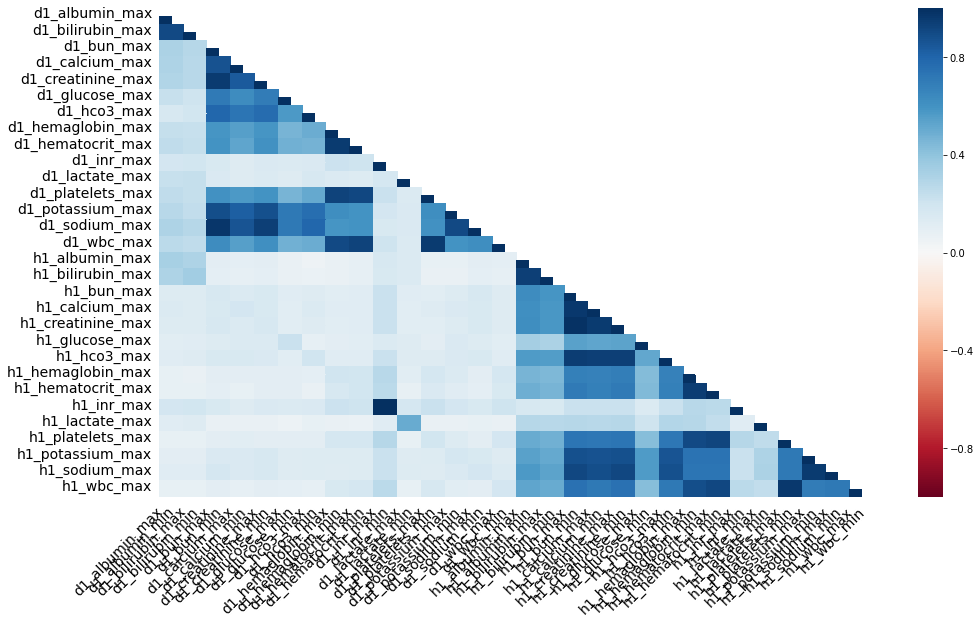

labs blood gas


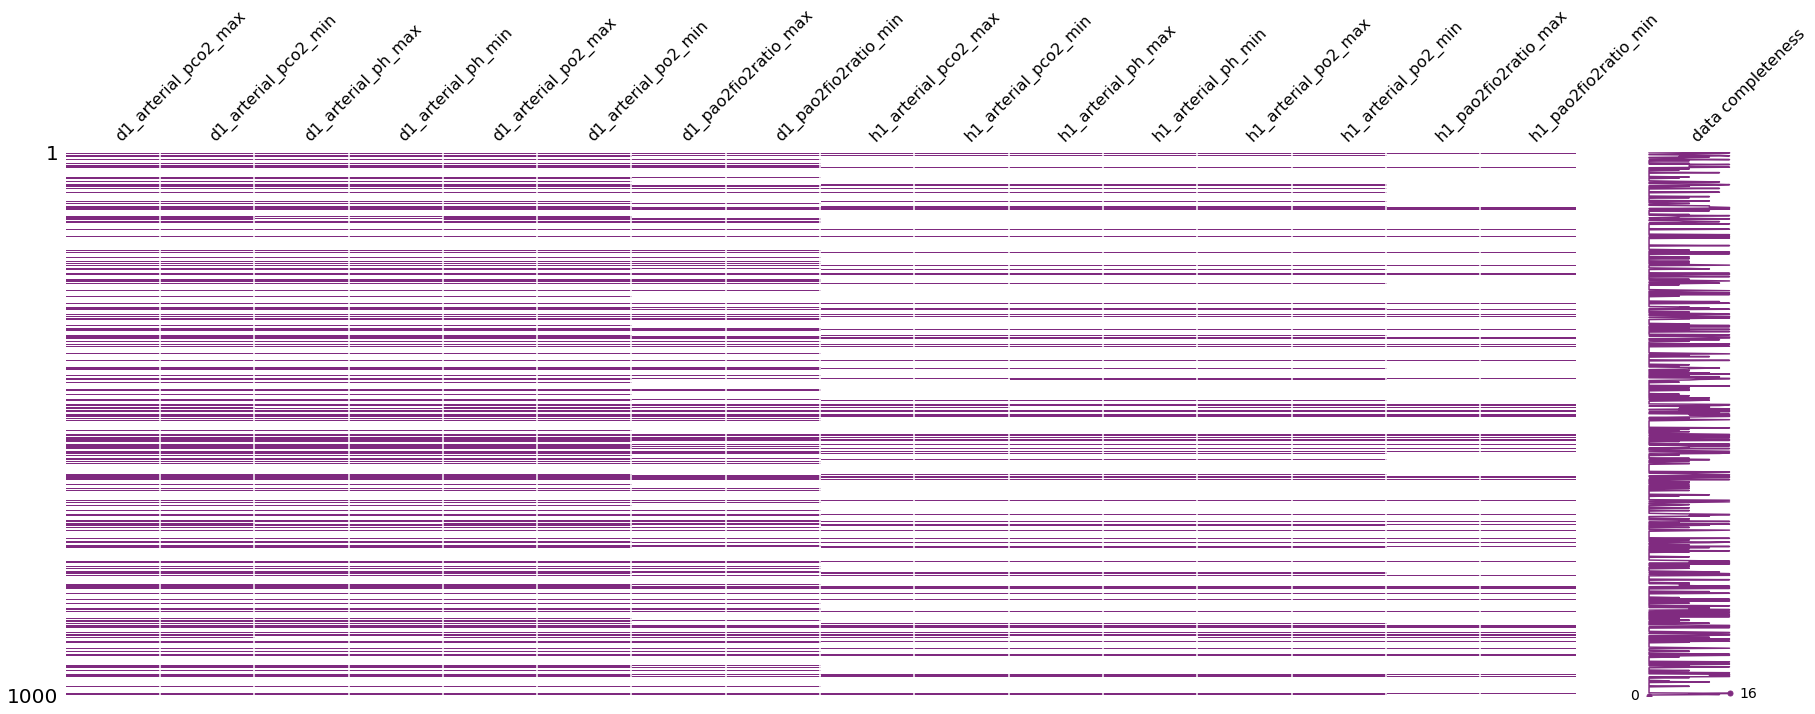

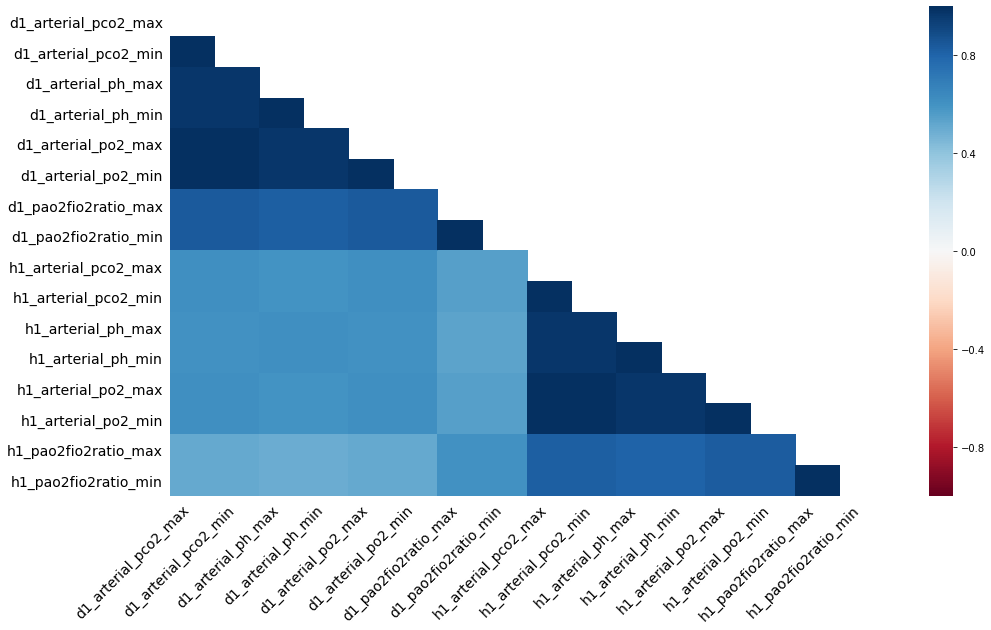

APACHE prediction


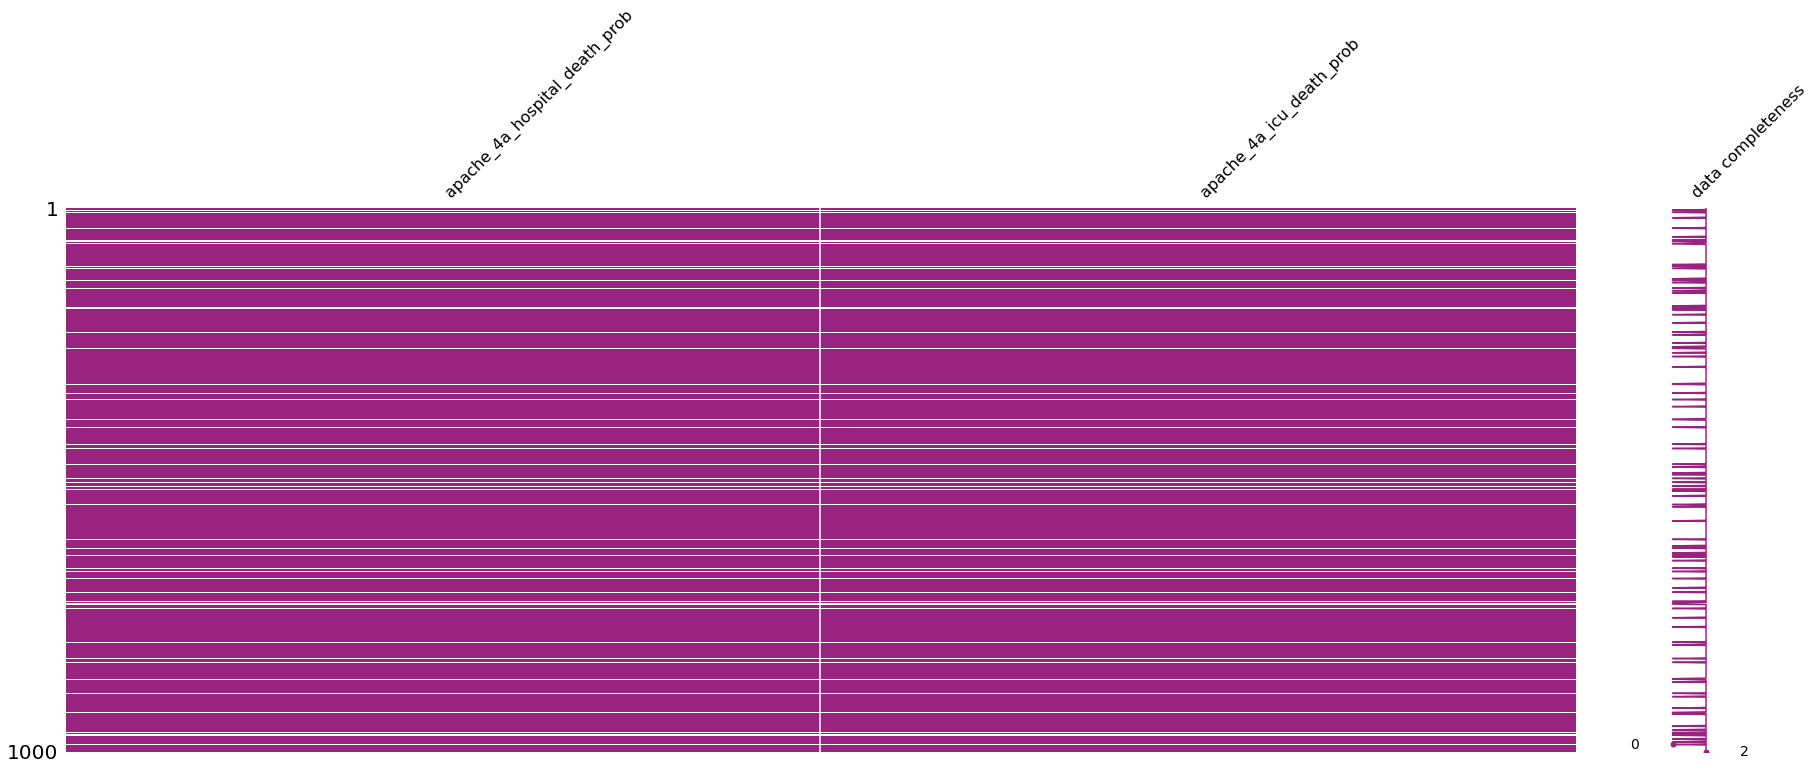

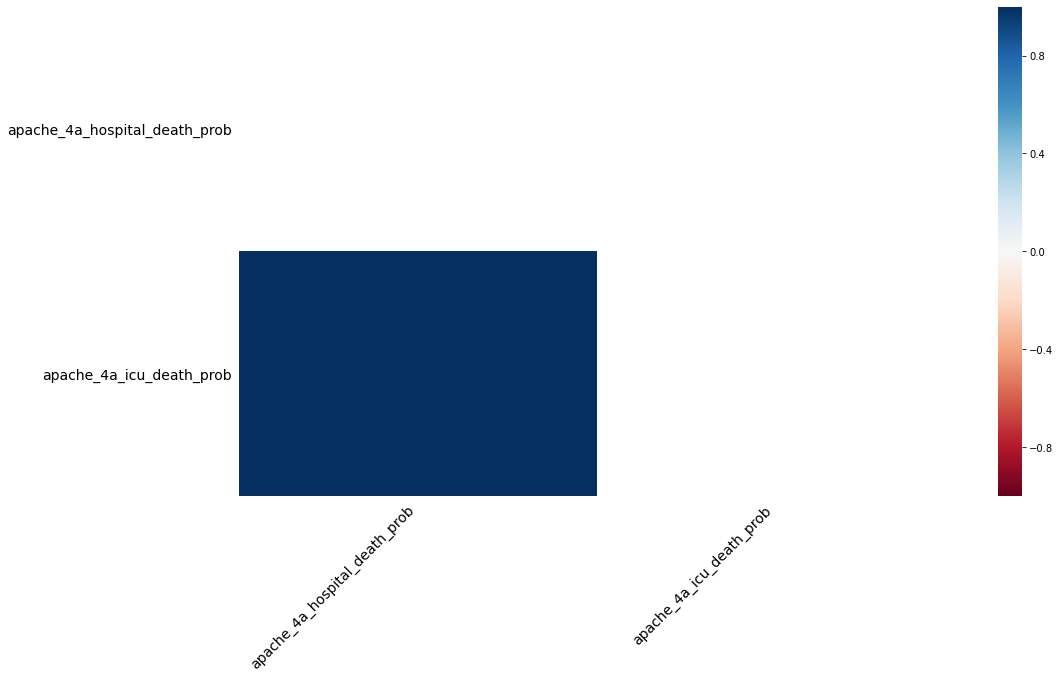

APACHE comorbidity


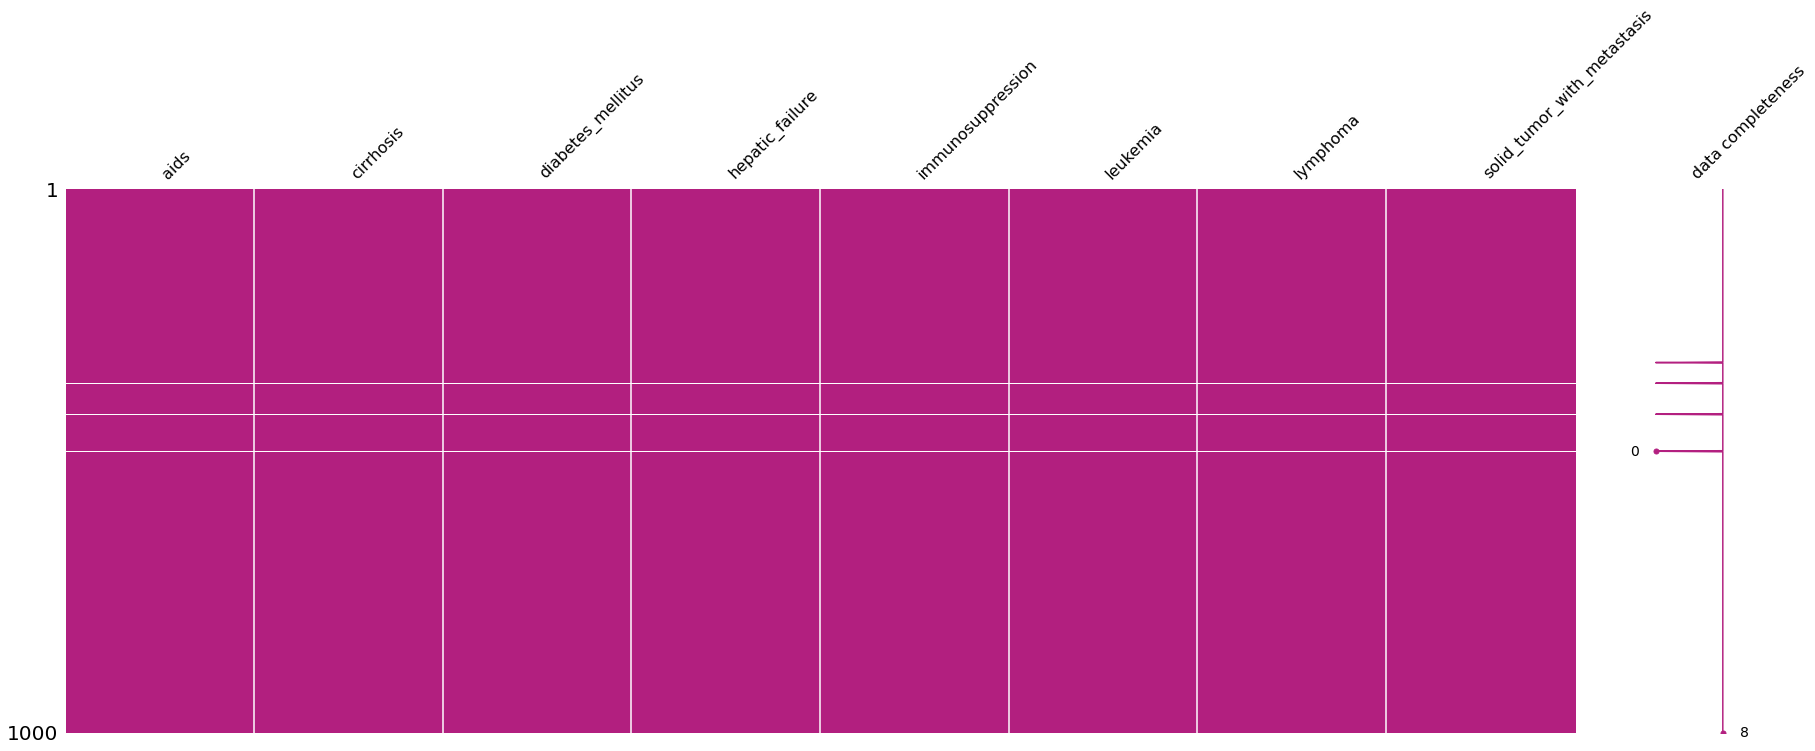

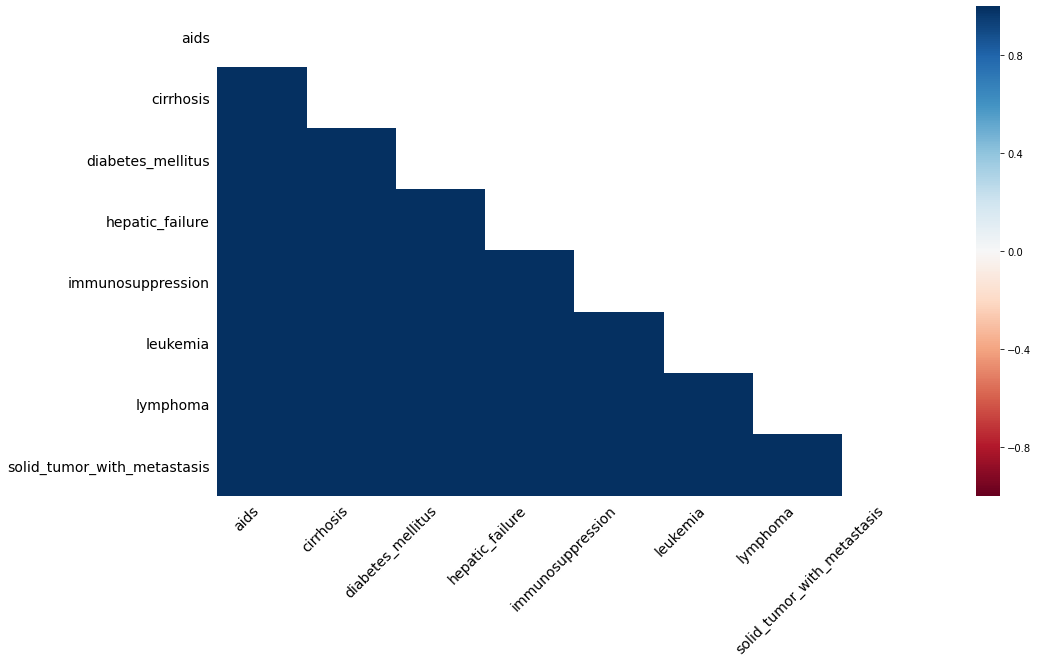

APACHE grouping


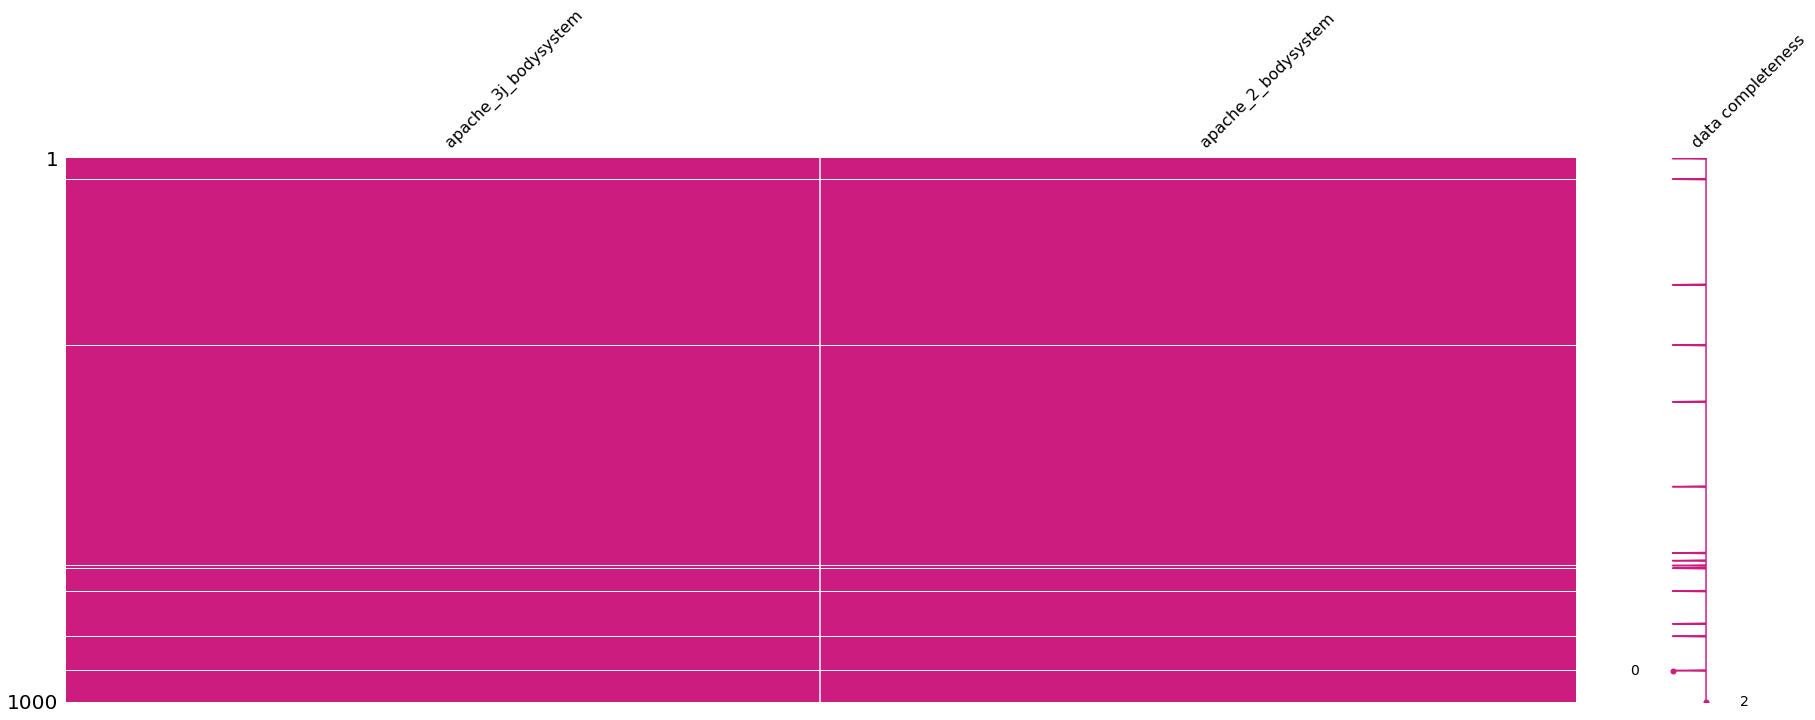

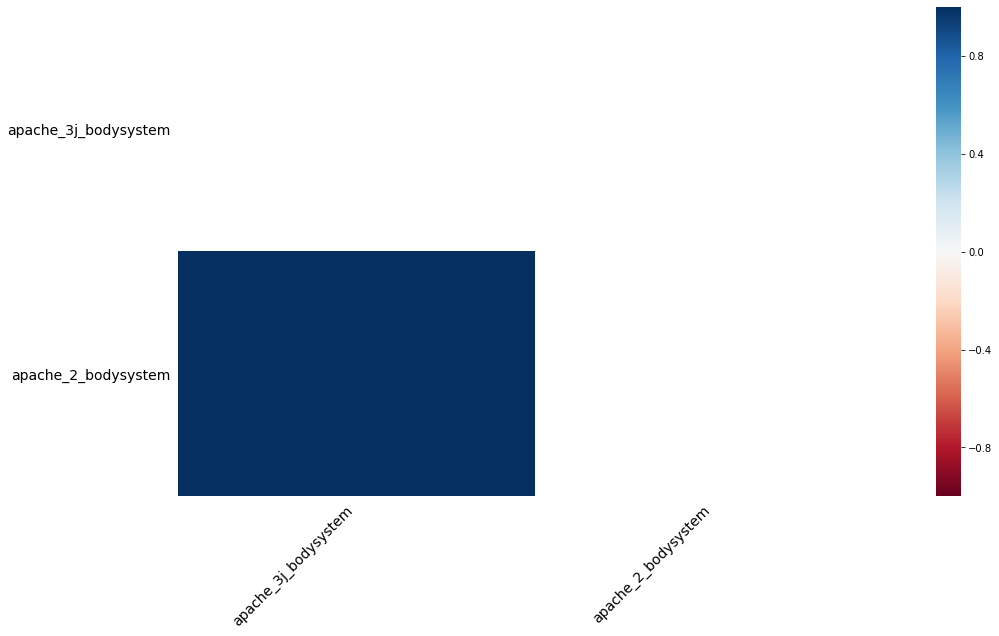

In [6]:
for color, variable in enumerate(data_dict["Category"].unique()):
    if variable not in ["GOSSIS example prediction", "identifier"]:
        print(variable)
        column_list = data_dict[data_dict["Category"] == variable]["Variable Name"].values.tolist()
        column_list = [f for f in column_list if f in df.columns]
        if len(column_list) > 0:
            msno.matrix(
                df[column_list].sample(1000),
                figsize=(30, 10),
                labels=True,
                color=(color / 10, 1 / (color + 1), 0.5),
                fontsize=16,
            )
            msno.heatmap(
                df[column_list], figsize=(16, 9), labels=False, fontsize=14
            )
            plt.show()